MADE BY ABHINAV SHARMA

------------------Age--------------------
   Age  Survived
0    0  0.704545
4    4  0.434783
1    1  0.428571
3    3  0.412037
2    2  0.337374
5    5  0.090909
------------------Fare--------------------
   Fare  Survived
7     7  0.735849
6     6  0.670455
3     3  0.500000
5     5  0.434343
4     4  0.426471
2     2  0.392857
1     1  0.306452
0     0  0.199357
['PassengerId' 'Survived' 'Pclass' 'Sex' 'Age' 'Fare' 'Embarked'
 'FamilySize' 'Age*Class*Fare' 'Age*Class' 'Age*Fare']
<bound method DataFrame.info of      PassengerId  Survived  Pclass  Sex  Age  Fare  Embarked  FamilySize  \
0              1         0       3    0    2     0         0           2   
1              2         1       1    1    3     6         1           2   
2              3         1       3    1    2     0         0           1   
3              4         1       1    1    3     5         0           2   
4              5         0       3    0    3     0         0           1   
..           ...       ...

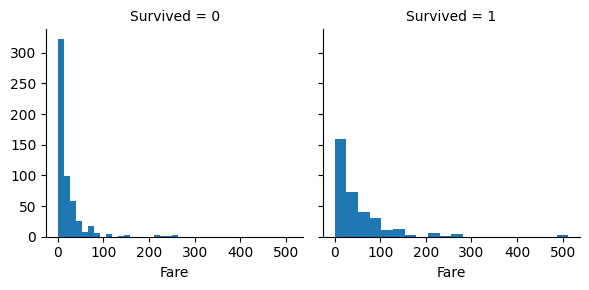

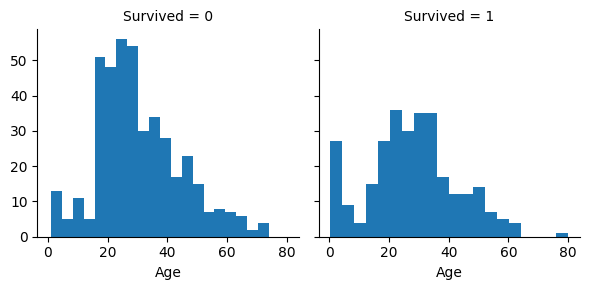

In [64]:
# Data Analysis
import pandas as pd
import numpy as np
import random as rnd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn import tree
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


def printGeneralStatistics( data ):
 print( data.describe() )					# Statistics
 print( data.describe(include=['O']) )		# Distribution

def printGeneralInformation( data ):
 print( data.columns.values )				# Feature names
 print( data.info )							# Data Types

def setAgeBoundaries (  ):
 for dataset in combine:
     dataset.loc[ dataset['Age'] <= 5, 'Age'] = 0
     dataset.loc[(dataset['Age'] > 5 ) & (dataset['Age'] <= 16), 'Age'] = 1
     dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 2
     dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 3
     dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 4
     dataset.loc[ dataset['Age'] > 64, 'Age'] = 5

def normalizeFamily( ):
 for dataset in combine:
   dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

def pivotingData ( data, entry1, entry2, groupBy, sortBy ):
 return data[[ entry1 , entry2 ]].groupby([groupBy], as_index=False).mean().sort_values(by=sortBy, ascending=False)

def printPivotedData( data ):
 #only categorical values
 print ( pivotingData ( data, 'Pclass','Survived','Pclass','Survived' ) )
 print ( pivotingData ( data, 'Sex','Survived','Sex','Survived' ) )
 print ( pivotingData ( data, 'SibSp','Survived','SibSp','Survived' ) )
 print ( pivotingData ( data, 'Parch','Survived','Parch','Survived' ) )


def visualizeNumericalCorrelation( data, feature1, feature2 ):
 g = sns.FacetGrid(data, col=feature2)
 g.map(plt.hist, feature1, bins=20)
 g.savefig("output.png")

def visualizeScatter( data, feature1, feature2 ):
 g = sns.FacetGrid(data, col='Survived',  hue="Survived")
 g = (g.map(plt.scatter, feature1, feature2, edgecolor="w")
      .add_legend())
 g.savefig("output2.png")

def visualizeSurvivedCorrelation(  feature1, feature2 ):
 grid = sns.FacetGrid(train_df, col='Survived', row=feature2, size=2.2, aspect=1.6)
 grid.map(plt.hist, feature1, alpha=.5, bins=20)
 grid.add_legend();
 grid.savefig("output3.png")

def classifyWithLogisticRegression ( trainingData, results, testData ):
 clf_logreg = LogisticRegression()
 clf_logreg.fit(trainingData, results)
 return clf_logreg.predict(testData)

def classifyWithDecisionTree ( trainingData, results, testData ):
 clf_tree = tree.DecisionTreeClassifier()
 clf_tree.fit(trainingData, results)
 return clf_tree.predict(testData)

def classifyWithSVM ( trainingData, results, testData ):
 clf_svm = SVC()
 clf_svm.fit(trainingData,results)
 return clf_svm.predict(testData)

def classifyWithPerceptron ( trainingData, results, testData ):
 clf_perceptron = Perceptron()
 clf_perceptron.fit(trainingData,results)
 return clf_perceptron.predict(testData)

def classifyWithKNeighbors ( trainingData, results, testData ):
 clf_KNN = KNeighborsClassifier()
 clf_KNN.fit(trainingData,results)
 return clf_KNN.predict(testData)

def classifyWithGaussianNaiveBayes ( trainingData, results, testData ):
 clf_GaussianNB = GaussianNB()
 clf_GaussianNB.fit(trainingData,results)
 return clf_GaussianNB.predict(testData)

def classifyWithStochasticGradientDescent ( trainingData, results, testData ):
 sgd = SGDClassifier()
 sgd.fit(trainingData, results)
 return sgd.predict(testData)

def classifyWithLinearSVC ( trainingData, results, testData ):
 linear_svc = LinearSVC()
 linear_svc.fit(trainingData, results)
 return linear_svc.predict(testData)

def classifyWithRandomForest ( trainingData, results, testData ):
 random_forest = RandomForestClassifier(n_estimators=100)
 random_forest.fit(trainingData, results)
 return random_forest.predict(testData)

def normalizeSex ( ):
 for dataset in combine:
   dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

def normalizeAges ( ):
 guess_ages = np.zeros((2,3))
 for dataset in combine:
   for i in range(0, 2):
     for j in range(0, 3):
       guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
       age_guess = guess_df.median()
       guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5

   for i in range(0, 2):
     for j in range(0, 3):
       dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),'Age'] = guess_ages[i,j]

   dataset['Age'] = dataset['Age'].astype(int)

def normalizeEmbarked( ):
 freq_port = train_df.Embarked.dropna().mode()[0]

 for dataset in combine:
   dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

 for dataset in combine:
   dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

def normalizeFare():

 for dataset in combine:
   dataset.loc[(dataset['Fare'] < 9), 'Fare'] = 0
   dataset.loc[(dataset['Fare'] >= 9) & (dataset ['Fare'] < 12), 'Fare'] = 1
   dataset.loc[(dataset['Fare'] >= 12) & (dataset ['Fare'] < 15), 'Fare'] = 2
   dataset.loc[(dataset['Fare'] >= 15) & (dataset ['Fare'] < 20), 'Fare'] = 3
   dataset.loc[(dataset['Fare'] >= 20) & (dataset ['Fare'] < 30), 'Fare'] = 4
   dataset.loc[(dataset['Fare'] >= 30) & (dataset ['Fare'] < 55), 'Fare'] = 5
   dataset.loc[(dataset['Fare'] >= 55) & (dataset ['Fare'] < 95), 'Fare'] = 6
   dataset.loc[(dataset['Fare'] >= 95),'Fare'] = 7
   dataset['Fare'] = dataset['Fare'].astype(int)



def normalizeAgeClass( ):
 for dataset in combine:
   dataset['Age*Class*Fare'] = dataset.Age * dataset.Pclass * dataset.Fare
   dataset['Age*Class'] = dataset.Age * dataset.Pclass
   dataset['Age*Fare'] = dataset.Age * dataset.Fare


def normalizeData( ):
 normalizeSex ( )
 normalizeAges( )
 setAgeBoundaries( )
 normalizeFamily( )
 normalizeEmbarked( )
 normalizeFare( )
 normalizeAgeClass( )



def getFareClass(data,cat):
 return data.loc[data['Fare'] == cat]



def evaluateSubmission():
    print ('A')


def main ( ):
 global train_df
 global test_df
 global combine

 # Training and Testing Data
 train_df = pd.read_csv('train.csv')
 test_df = pd.read_csv('test.csv')
 # Drop Useless Features
 train_df = train_df.drop(['Ticket', 'Cabin', 'Name'], axis=1)
 test_df = test_df.drop(['Ticket', 'Cabin', 'Name'], axis=1)
 visualizeNumericalCorrelation(train_df,'Fare','Survived')
 visualizeNumericalCorrelation(train_df,'Age','Survived')


 test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
 train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
 train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

 # Normalize both data sets
 combine = [train_df, test_df]
 normalizeData( )
 train_df = train_df.drop(['Parch', 'SibSp'], axis=1)
 test_df = test_df.drop(['Parch', 'SibSp'], axis=1)
 train_df = train_df.drop(['FareBand'], axis=1)



 print  ("------------------Age--------------------")
 print (pivotingData( train_df, 'Age', 'Survived', 'Age', 'Survived' ))
 print  ("------------------Fare--------------------")
 print (pivotingData( train_df, 'Fare', 'Survived', 'Fare', 'Survived' ))

 #visualizeNumericalCorrelation(getFareClass(train_df,0),'Age','Survived')

 combine = [train_df, test_df]
 printGeneralInformation(train_df)

 # Setting up data
 X_train = train_df.drop(["Survived","PassengerId","Fare","Age","Pclass"], axis=1)
 Y_train = train_df["Survived"]
 X_test  = test_df.drop(["PassengerId","Fare","Age","Pclass"], axis=1).copy()
 X_train.shape, Y_train.shape, X_test.shape

 print (X_train)

 # Use predictive model (ML)
 prediction = classifyWithRandomForest(X_train, Y_train, X_test)

 #Build the answer
 submission = pd.DataFrame({
   "PassengerId": test_df["PassengerId"],
   "Survived": prediction
   })

 # Put it in csv file
 submission.to_csv('submission.csv', index=False)


 evaluateSubmission()


main( )